In [1]:
#Q-4

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
activations= {'relu': nn.ReLU(), 'gelu': nn.GELU(), 'silu': nn.SiLU(), 'leaky_relu': nn.LeakyReLU(), 'elu': nn.ELU()}

def sin(x):
  return np.sin(x)

<function matplotlib.pyplot.show(close=None, block=None)>

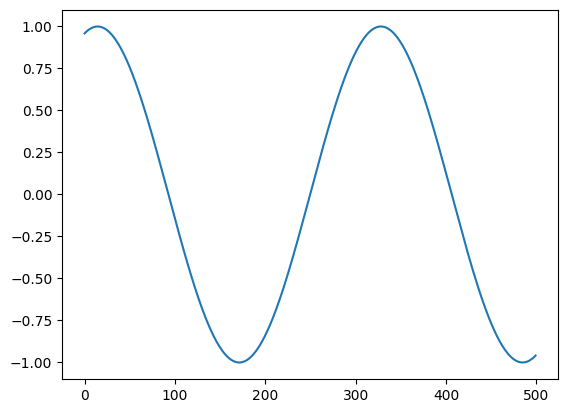

In [3]:
plt.plot(sin(np.linspace(-5,5,500)))
plt.show

In [4]:
class neural_network(nn.Module):
  def __init__(self,activation):
    super(neural_network,self).__init__()
    self.n1=nn.Linear(1,512)
    self.n2=nn.Linear(512,1)
    self.activation=activations[activation]

  def forward(self,x):
    x=self.activation(self.n1(x))
    x=self.n2(x)
    return x

In [5]:
x_train=torch.linspace(0,2*torch.pi,500)
x_val=torch.cat((torch.linspace(-torch.pi,0,500),torch.linspace(2*torch.pi,3*torch.pi,500)))
y_train=torch.sin(x_train)
y_val=torch.sin(x_val)

train_loss=[]
valid_loss=[]

In [14]:
def train(model,x_train,y_train,x_val,y_val,epochs,lr):
  criterion=nn.MSELoss()
  optimizer=optim.SGD(model.parameters(),lr=lr)
  for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred=model(x_train)
    tr_loss=criterion(y_pred,y_train)
    tr_loss.backward()
    optimizer.step()

    with torch.no_grad():
      y_predv=model(x_val)
      val_loss=criterion(y_predv,y_val)

    train_loss.append(tr_loss)
    valid_loss.append(val_loss)
    return train_loss,valid_loss

In [7]:
x_train=x_train.unsqueeze(1)
y_train=y_train.unsqueeze(1)
x_val=x_val.unsqueeze(1)
y_val=y_val.unsqueeze(1)

In [10]:
def plot_result(x_train,y_train,y_pred,activation):
    plt.figure(figsize=(5,3))
    plt.plot(x_train.numpy(),y_train.numpy(), label="train data",color= 'red' )
    plt.plot(x_train.numpy(),y_pred.squeeze(1).numpy(), label=f'prediction via ({activation})', color='blue')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{activation}')
    plt.show()

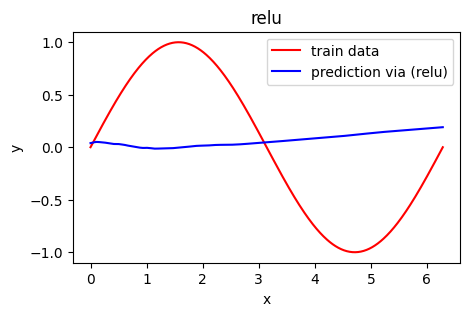

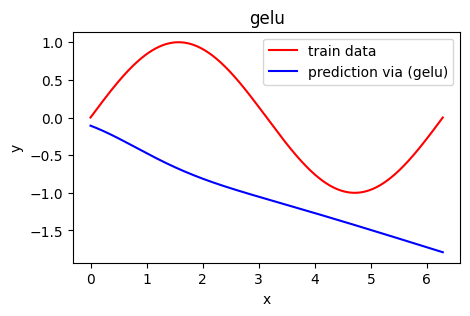

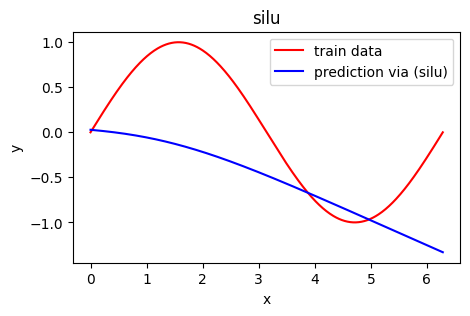

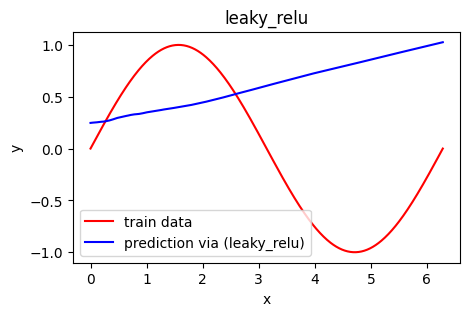

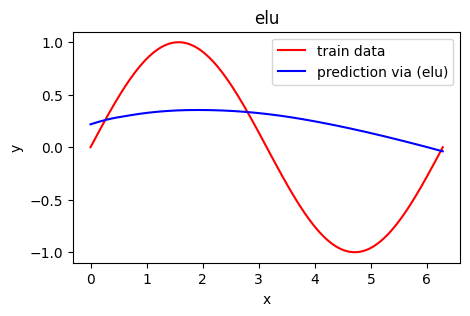

In [20]:
for activation_name,activation_func in activations.items():
  model=neural_network(activation_name)
  tr_loss,val_loss=train(model,x_train,y_train,x_val,y_val,500,0.0001)
  with torch.no_grad():
        y_pred = model(x_train.unsqueeze(1))
        plot_result(x_train,y_train,y_pred,activation_name)